In [24]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Python imports
import pandas as pd
import numpy as np
from pydataset import data

#Acquire, Prepare, Explore Imports
from acquire import get_telco_data
from prepare import clean_telco
from prepare import get_metrics

import explore

#Math imports
from scipy import stats

# ML imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
# Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
from graphviz import Graph
plt.rcParams['figure.figsize'] = (4, 2)

<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 


## <font color='darkgreen'>First Step: Acquire Data and Prepare Data</font>

In [25]:
telco = get_telco_data()
telco = clean_telco(telco)
telco.to_csv('telco_clean.csv')

In [26]:
telco.head(1)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner,dependents,phone_service,paperless_billing,...,Month_to_month,One_year_contract,Two_year_contract,DSL,Fiber_optic,No_internet,Bank_transfer_(automatic),Credit_card_(automatic),Electronic_check,Mailed_check
0,0003-MKNFE,0,9,59.9,542.4,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [27]:
telco.shape

(7043, 28)

In [28]:
#Split Data
train, validate, test = explore.train_validate_test_split(telco,'churn', seed=123)
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

In [29]:
#check shape 
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner,dependents,phone_service,paperless_billing,churn,...,Month_to_month,One_year_contract,Two_year_contract,DSL,Fiber_optic,No_internet,Bank_transfer_(automatic),Credit_card_(automatic),Electronic_check,Mailed_check
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,...,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.163327,31.931017,64.823497,2257.333794,0.501902,0.484403,0.299011,0.904641,0.585848,0.265280,...,0.549328,0.220391,0.230282,0.346183,0.441288,0.212529,0.218108,0.211007,0.336799,0.234086
std,0.369711,24.365751,29.942691,2263.000426,0.500060,0.499820,0.457883,0.293747,0.492637,0.441538,...,0.497624,0.414563,0.421066,0.475813,0.496604,0.409149,0.413014,0.408075,0.472676,0.423480
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,36.350000,400.700000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,70.150000,1346.900000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,54.000000,89.750000,3722.775000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.600000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5670 to 6867
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                3943 non-null   object 
 1   senior_citizen             3943 non-null   int64  
 2   tenure                     3943 non-null   int64  
 3   monthly_charges            3943 non-null   float64
 4   total_charges              3943 non-null   float64
 5   gender_Male                3943 non-null   uint8  
 6   partner                    3943 non-null   uint8  
 7   dependents                 3943 non-null   uint8  
 8   phone_service              3943 non-null   uint8  
 9   paperless_billing          3943 non-null   uint8  
 10  churn                      3943 non-null   uint8  
 11  online_security            3943 non-null   uint8  
 12  online_backup              3943 non-null   uint8  
 13  device_protection          3943 non-null   ui

<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 


# <font color='darkgreen'>Next Step: Data Exploration</font>

In [31]:
#Established categorical and quantitative variables to use in exploration and find univariate stats

cat_vars = ['gender_Male',
            'senior_citizen',
            'partner',
            'dependents',
            'phone_service',
            'paperless_billing',
            'churn',
            'online_security',
            'online_backup',
            'device_protection',
            'tech_support',
            'streaming_tv',
            'streaming_movies',
            'multiple_lines',
            'Month_to_month',
            'One_year_contract',
            'Two_year_contract',
            'DSL',
            'Fiber_optic',
            'No_internet',
            'Bank_transfer_(automatic)',
            'Credit_card_(automatic)',
            'Electronic_check',
            'Mailed_check']

quant_vars = ['tenure', 'monthly_charges', 'total_charges']

gender_Male 
_____________________

       chi2  p-value  degrees of freedom
0  0.156854  0.69207                   1

observed:
 churn           0     1   All
gender_Male                  
0            1437   527  1964
1            1460   519  1979
All          2897  1046  3943

expected:
              0           1
0  1442.989602  521.010398
1  1454.010398  524.989602


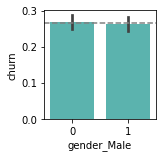


_____________________

senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  57.427698  3.506345e-14                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2502   797  3299
1                395   249   644
All             2897  1046  3943

expected:
              0           1
0  2423.840477  875.159523
1   473.159523  170.840477


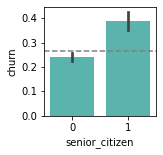


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  81.646173  1.627667e-19                   1

observed:
 churn       0     1   All
partner                  
0        1368   665  2033
1        1529   381  1910
All      2897  1046  3943

expected:
              0           1
0  1493.685265  539.314735
1  1403.314735  506.685265


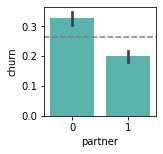


_____________________

dependents 
_____________________

        chi2       p-value  degrees of freedom
0  91.289781  1.240999e-21                   1

observed:
 churn          0     1   All
dependents                  
0           1909   855  2764
1            988   191  1179
All         2897  1046  3943

expected:
              0           1
0  2030.765407  733.234593
1   866.234593  312.765407


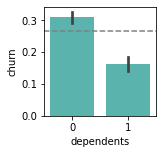


_____________________

phone_service 
_____________________

       chi2  p-value  degrees of freedom
0  0.158869   0.6902                   1

observed:
 churn             0     1   All
phone_service                  
0               280    96   376
1              2617   950  3567
All            2897  1046  3943

expected:
              0           1
0   276.254628   99.745372
1  2620.745372  946.254628


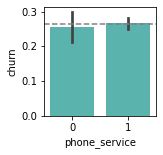


_____________________

paperless_billing 
_____________________

        chi2       p-value  degrees of freedom
0  140.22847  2.372755e-32                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1362   271  1633
1                  1535   775  2310
All                2897  1046  3943

expected:
              0           1
0  1199.797362  433.202638
1  1697.202638  612.797362


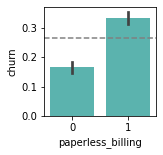


_____________________

churn 
_____________________

          chi2  p-value  degrees of freedom
0  3937.871007      0.0                   1

observed:
 churn     0     1   All
churn                  
0      2897     0  2897
1         0  1046  1046
All    2897  1046  3943

expected:
              0           1
0  2128.483135  768.516865
1   768.516865  277.483135


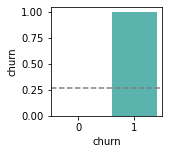


_____________________

online_security 
_____________________

         chi2       p-value  degrees of freedom
0  114.851907  8.479963e-27                   1

observed:
 churn               0     1   All
online_security                  
0                1925   879  2804
1                 972   167  1139
All              2897  1046  3943

expected:
              0           1
0  2060.154197  743.845803
1   836.845803  302.154197


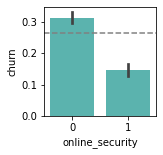


_____________________

online_backup 
_____________________

        chi2   p-value  degrees of freedom
0  13.856071  0.000197                   1

observed:
 churn             0     1   All
online_backup                  
0              1846   734  2580
1              1051   312  1363
All            2897  1046  3943

expected:
              0           1
0  1895.576972  684.423028
1  1001.423028  361.576972


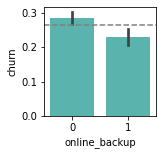


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  16.406735  0.000051                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1864   746  2610
1                  1033   300  1333
All                2897  1046  3943

expected:
              0           1
0  1917.618565  692.381435
1   979.381435  353.618565


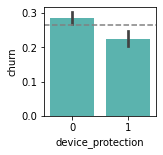


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  111.474188  4.658311e-26                   1

observed:
 churn            0     1   All
tech_support                  
0             1937   880  2817
1              960   166  1126
All           2897  1046  3943

expected:
              0           1
0  2069.705554  747.294446
1   827.294446  298.705554


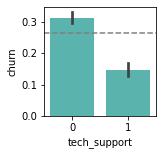


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  14.324719  0.000154                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1850   598  2448
1             1047   448  1495
All           2897  1046  3943

expected:
              0           1
0  1798.593964  649.406036
1  1098.406036  396.593964


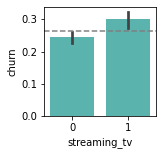


_____________________

streaming_movies 
_____________________

       chi2   p-value  degrees of freedom
0  9.992303  0.001572                   1

observed:
 churn                0     1   All
streaming_movies                  
0                 1819   598  2417
1                 1078   448  1526
All               2897  1046  3943

expected:
              0           1
0  1775.817652  641.182348
1  1121.182348  404.817652


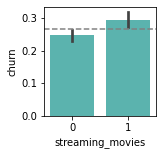


_____________________

multiple_lines 
_____________________

       chi2  p-value  degrees of freedom
0  5.115686  0.02371                   1

observed:
 churn              0     1   All
multiple_lines                  
0               1722   579  2301
1               1175   467  1642
All             2897  1046  3943

expected:
             0          1
0  1690.59016  610.40984
1  1206.40984  435.59016


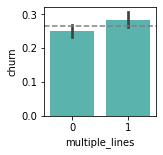


_____________________

Month_to_month 
_____________________

        chi2        p-value  degrees of freedom
0  607.24542  4.445065e-134                   1

observed:
 churn              0     1   All
Month_to_month                  
0               1646   131  1777
1               1251   915  2166
All             2897  1046  3943

expected:
              0           1
0  1305.597007  471.402993
1  1591.402993  574.597007


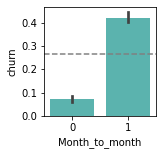


_____________________

One_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  114.627334  9.496796e-27                   1

observed:
 churn                 0     1   All
One_year_contract                  
0                  2135   939  3074
1                   762   107   869
All                2897  1046  3943

expected:
              0           1
0  2258.528532  815.471468
1   638.471468  230.528532


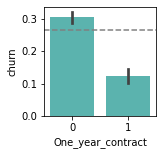


_____________________

Two_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  343.690562  1.002639e-76                   1

observed:
 churn                 0     1   All
Two_year_contract                  
0                  2013  1022  3035
1                   884    24   908
All                2897  1046  3943

expected:
              0           1
0  2229.874461  805.125539
1   667.125539  240.874461


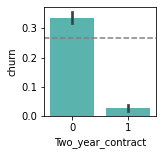


_____________________

DSL 
_____________________

        chi2       p-value  degrees of freedom
0  60.526153  7.260737e-15                   1

observed:
 churn     0     1   All
DSL                    
0      1791   787  2578
1      1106   259  1365
All    2897  1046  3943

expected:
              0           1
0  1894.107532  683.892468
1  1002.892468  362.107532


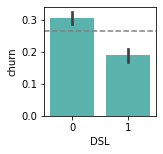


_____________________

Fiber_optic 
_____________________

         chi2       p-value  degrees of freedom
0  362.033241  1.015910e-80                   1

observed:
 churn           0     1   All
Fiber_optic                  
0            1881   322  2203
1            1016   724  1740
All          2897  1046  3943

expected:
              0           1
0  1618.587624  584.412376
1  1278.412376  461.587624


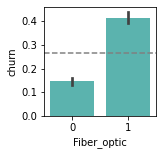


_____________________

No_internet 
_____________________

         chi2       p-value  degrees of freedom
0  196.074908  1.501123e-44                   1

observed:
 churn           0     1   All
No_internet                  
0            2122   983  3105
1             775    63   838
All          2897  1046  3943

expected:
              0           1
0  2281.304844  823.695156
1   615.695156  222.304844


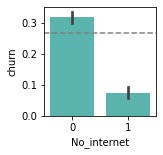


_____________________

Bank_transfer_(automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  34.909878  3.453244e-09                   1

observed:
 churn                         0     1   All
Bank_transfer_(automatic)                  
0                          2197   886  3083
1                           700   160   860
All                        2897  1046  3943

expected:
              0           1
0  2265.141009  817.858991
1   631.858991  228.141009


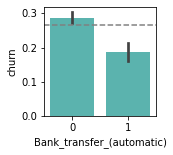


_____________________

Credit_card_(automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  69.374518  8.143400e-17                   1

observed:
 churn                       0     1   All
Credit_card_(automatic)                  
0                        2191   920  3111
1                         706   126   832
All                      2897  1046  3943

expected:
              0           1
0  2285.713163  825.286837
1   611.286837  220.713163


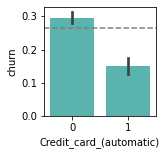


_____________________

Electronic_check 
_____________________

         chi2       p-value  degrees of freedom
0  319.545884  1.818937e-71                   1

observed:
 churn                0     1   All
Electronic_check                  
0                 2156   459  2615
1                  741   587  1328
All               2897  1046  3943

expected:
              0           1
0  1921.292163  693.707837
1   975.707837  352.292163


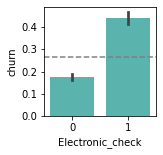


_____________________

Mailed_check 
_____________________

        chi2       p-value  degrees of freedom
0  36.950819  1.211468e-09                   1

observed:
 churn            0     1   All
Mailed_check                  
0             2147   873  3020
1              750   173   923
All           2897  1046  3943

expected:
              0           1
0  2218.853665  801.146335
1   678.146335  244.853665


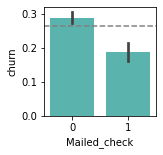


_____________________

tenure 
____________________



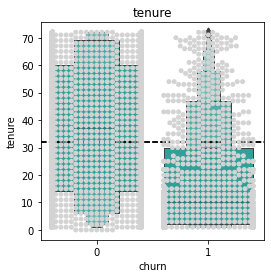

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  36.940283  23.962669  0.0  14.0  37.0  60.0  72.0
1      1046.0  18.057361  19.647335  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2225608.5, pvalue=2.4298450761804645e-112)

____________________

monthly_charges 
____________________



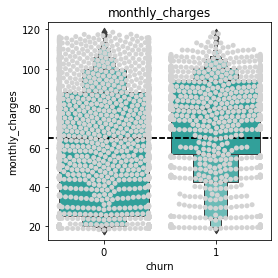

        count       mean        std    min      25%    50%    75%     max
churn                                                                    
0      2897.0  61.413997  30.890138  18.25  25.1500  64.60  88.40  118.60
1      1046.0  74.266444  24.823691  18.85  56.6625  79.65  94.25  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1156450.0, pvalue=6.206014591716352e-30)

____________________

total_charges 
____________________



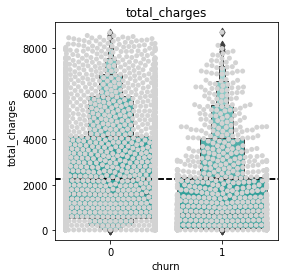

        count         mean          std    min       25%       50%       75%  \
churn                                                                          
0      2897.0  2518.957491  2324.599494  18.80  562.7000  1615.100  4144.900   
1      1046.0  1532.741205  1904.635962  18.85  114.5625   712.925  2319.125   

          max  
churn          
0      8670.1  
1      8684.8   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1964560.0, pvalue=5.093927002332789e-46)

____________________



In [32]:
#Used explore.py function for visualization and comparisons single category data
explore.explore_bivariate(train,'churn', cat_vars, quant_vars)


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

### <font color="blue">Takeaways from Univariate Stats<font>
    * The median tenure for customers is 29 months
    * 55% of total customers have month-to-month contracts
    * Almost 27% of total customers have churned
    * Majority of variables were skewed to the right


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

## <font color="darkgreen">Bivariate Stats</font>

gender_Male 
_____________________

       chi2  p-value  degrees of freedom
0  0.156854  0.69207                   1

observed:
 churn           0     1   All
gender_Male                  
0            1437   527  1964
1            1460   519  1979
All          2897  1046  3943

expected:
              0           1
0  1442.989602  521.010398
1  1454.010398  524.989602


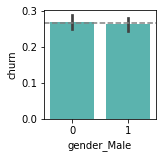


_____________________

senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  57.427698  3.506345e-14                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2502   797  3299
1                395   249   644
All             2897  1046  3943

expected:
              0           1
0  2423.840477  875.159523
1   473.159523  170.840477


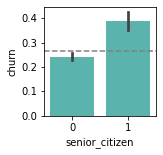


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  81.646173  1.627667e-19                   1

observed:
 churn       0     1   All
partner                  
0        1368   665  2033
1        1529   381  1910
All      2897  1046  3943

expected:
              0           1
0  1493.685265  539.314735
1  1403.314735  506.685265


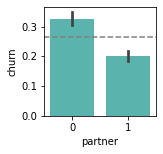


_____________________

dependents 
_____________________

        chi2       p-value  degrees of freedom
0  91.289781  1.240999e-21                   1

observed:
 churn          0     1   All
dependents                  
0           1909   855  2764
1            988   191  1179
All         2897  1046  3943

expected:
              0           1
0  2030.765407  733.234593
1   866.234593  312.765407


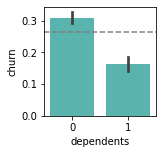


_____________________

phone_service 
_____________________

       chi2  p-value  degrees of freedom
0  0.158869   0.6902                   1

observed:
 churn             0     1   All
phone_service                  
0               280    96   376
1              2617   950  3567
All            2897  1046  3943

expected:
              0           1
0   276.254628   99.745372
1  2620.745372  946.254628


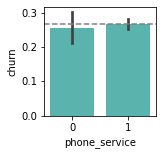


_____________________

paperless_billing 
_____________________

        chi2       p-value  degrees of freedom
0  140.22847  2.372755e-32                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1362   271  1633
1                  1535   775  2310
All                2897  1046  3943

expected:
              0           1
0  1199.797362  433.202638
1  1697.202638  612.797362


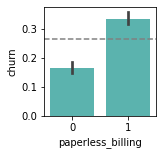


_____________________

churn 
_____________________

          chi2  p-value  degrees of freedom
0  3937.871007      0.0                   1

observed:
 churn     0     1   All
churn                  
0      2897     0  2897
1         0  1046  1046
All    2897  1046  3943

expected:
              0           1
0  2128.483135  768.516865
1   768.516865  277.483135


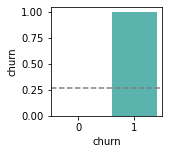


_____________________

online_security 
_____________________

         chi2       p-value  degrees of freedom
0  114.851907  8.479963e-27                   1

observed:
 churn               0     1   All
online_security                  
0                1925   879  2804
1                 972   167  1139
All              2897  1046  3943

expected:
              0           1
0  2060.154197  743.845803
1   836.845803  302.154197


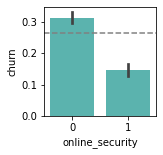


_____________________

online_backup 
_____________________

        chi2   p-value  degrees of freedom
0  13.856071  0.000197                   1

observed:
 churn             0     1   All
online_backup                  
0              1846   734  2580
1              1051   312  1363
All            2897  1046  3943

expected:
              0           1
0  1895.576972  684.423028
1  1001.423028  361.576972


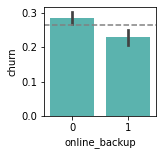


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  16.406735  0.000051                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1864   746  2610
1                  1033   300  1333
All                2897  1046  3943

expected:
              0           1
0  1917.618565  692.381435
1   979.381435  353.618565


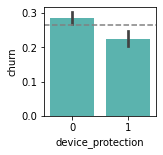


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  111.474188  4.658311e-26                   1

observed:
 churn            0     1   All
tech_support                  
0             1937   880  2817
1              960   166  1126
All           2897  1046  3943

expected:
              0           1
0  2069.705554  747.294446
1   827.294446  298.705554


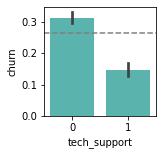


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  14.324719  0.000154                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1850   598  2448
1             1047   448  1495
All           2897  1046  3943

expected:
              0           1
0  1798.593964  649.406036
1  1098.406036  396.593964


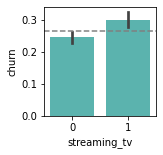


_____________________

streaming_movies 
_____________________

       chi2   p-value  degrees of freedom
0  9.992303  0.001572                   1

observed:
 churn                0     1   All
streaming_movies                  
0                 1819   598  2417
1                 1078   448  1526
All               2897  1046  3943

expected:
              0           1
0  1775.817652  641.182348
1  1121.182348  404.817652


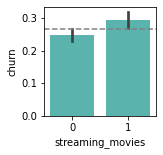


_____________________

multiple_lines 
_____________________

       chi2  p-value  degrees of freedom
0  5.115686  0.02371                   1

observed:
 churn              0     1   All
multiple_lines                  
0               1722   579  2301
1               1175   467  1642
All             2897  1046  3943

expected:
             0          1
0  1690.59016  610.40984
1  1206.40984  435.59016


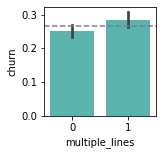


_____________________

Month_to_month 
_____________________

        chi2        p-value  degrees of freedom
0  607.24542  4.445065e-134                   1

observed:
 churn              0     1   All
Month_to_month                  
0               1646   131  1777
1               1251   915  2166
All             2897  1046  3943

expected:
              0           1
0  1305.597007  471.402993
1  1591.402993  574.597007


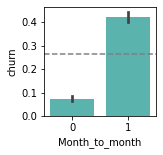


_____________________

One_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  114.627334  9.496796e-27                   1

observed:
 churn                 0     1   All
One_year_contract                  
0                  2135   939  3074
1                   762   107   869
All                2897  1046  3943

expected:
              0           1
0  2258.528532  815.471468
1   638.471468  230.528532


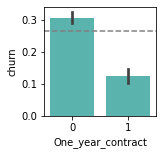


_____________________

Two_year_contract 
_____________________

         chi2       p-value  degrees of freedom
0  343.690562  1.002639e-76                   1

observed:
 churn                 0     1   All
Two_year_contract                  
0                  2013  1022  3035
1                   884    24   908
All                2897  1046  3943

expected:
              0           1
0  2229.874461  805.125539
1   667.125539  240.874461


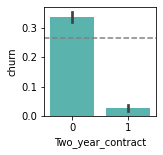


_____________________

DSL 
_____________________

        chi2       p-value  degrees of freedom
0  60.526153  7.260737e-15                   1

observed:
 churn     0     1   All
DSL                    
0      1791   787  2578
1      1106   259  1365
All    2897  1046  3943

expected:
              0           1
0  1894.107532  683.892468
1  1002.892468  362.107532


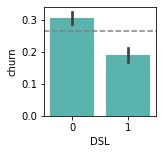


_____________________

Fiber_optic 
_____________________

         chi2       p-value  degrees of freedom
0  362.033241  1.015910e-80                   1

observed:
 churn           0     1   All
Fiber_optic                  
0            1881   322  2203
1            1016   724  1740
All          2897  1046  3943

expected:
              0           1
0  1618.587624  584.412376
1  1278.412376  461.587624


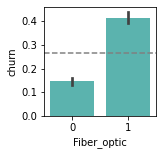


_____________________

No_internet 
_____________________

         chi2       p-value  degrees of freedom
0  196.074908  1.501123e-44                   1

observed:
 churn           0     1   All
No_internet                  
0            2122   983  3105
1             775    63   838
All          2897  1046  3943

expected:
              0           1
0  2281.304844  823.695156
1   615.695156  222.304844


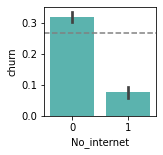


_____________________

Bank_transfer_(automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  34.909878  3.453244e-09                   1

observed:
 churn                         0     1   All
Bank_transfer_(automatic)                  
0                          2197   886  3083
1                           700   160   860
All                        2897  1046  3943

expected:
              0           1
0  2265.141009  817.858991
1   631.858991  228.141009


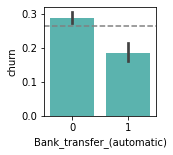


_____________________

Credit_card_(automatic) 
_____________________

        chi2       p-value  degrees of freedom
0  69.374518  8.143400e-17                   1

observed:
 churn                       0     1   All
Credit_card_(automatic)                  
0                        2191   920  3111
1                         706   126   832
All                      2897  1046  3943

expected:
              0           1
0  2285.713163  825.286837
1   611.286837  220.713163


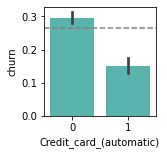


_____________________

Electronic_check 
_____________________

         chi2       p-value  degrees of freedom
0  319.545884  1.818937e-71                   1

observed:
 churn                0     1   All
Electronic_check                  
0                 2156   459  2615
1                  741   587  1328
All               2897  1046  3943

expected:
              0           1
0  1921.292163  693.707837
1   975.707837  352.292163


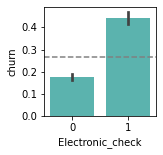


_____________________

Mailed_check 
_____________________

        chi2       p-value  degrees of freedom
0  36.950819  1.211468e-09                   1

observed:
 churn            0     1   All
Mailed_check                  
0             2147   873  3020
1              750   173   923
All           2897  1046  3943

expected:
              0           1
0  2218.853665  801.146335
1   678.146335  244.853665


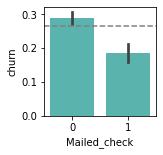


_____________________

tenure 
____________________



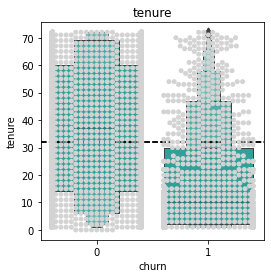

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  36.940283  23.962669  0.0  14.0  37.0  60.0  72.0
1      1046.0  18.057361  19.647335  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2225608.5, pvalue=2.4298450761804645e-112)

____________________

monthly_charges 
____________________



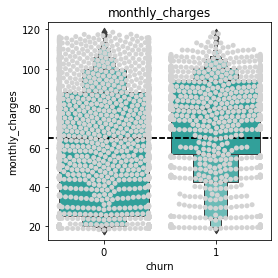

        count       mean        std    min      25%    50%    75%     max
churn                                                                    
0      2897.0  61.413997  30.890138  18.25  25.1500  64.60  88.40  118.60
1      1046.0  74.266444  24.823691  18.85  56.6625  79.65  94.25  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1156450.0, pvalue=6.206014591716352e-30)

____________________

total_charges 
____________________



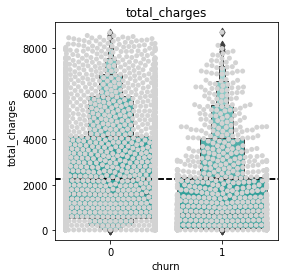

        count         mean          std    min       25%       50%       75%  \
churn                                                                          
0      2897.0  2518.957491  2324.599494  18.80  562.7000  1615.100  4144.900   
1      1046.0  1532.741205  1904.635962  18.85  114.5625   712.925  2319.125   

          max  
churn          
0      8670.1  
1      8684.8   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1964560.0, pvalue=5.093927002332789e-46)

____________________



In [33]:
#Comparison of variables with churn as the target
explore.explore_bivariate(train,'churn', cat_vars, quant_vars)

* Month to month customers rate of churn higher than that of one-year contract customers
* Fiber optic customers churn at a higher rate than DSL customers without internet
    - There is a dependency between fiber sevice and churn
* Monthly charges for churned customers are higher than for those who do not churn     



<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

### <font color ="darkgreen">Multivariate Exploration</font>

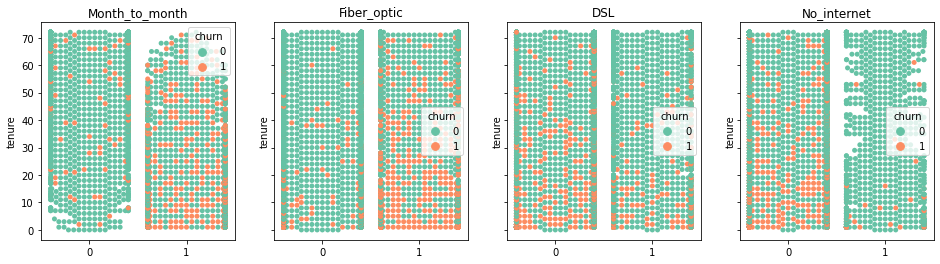

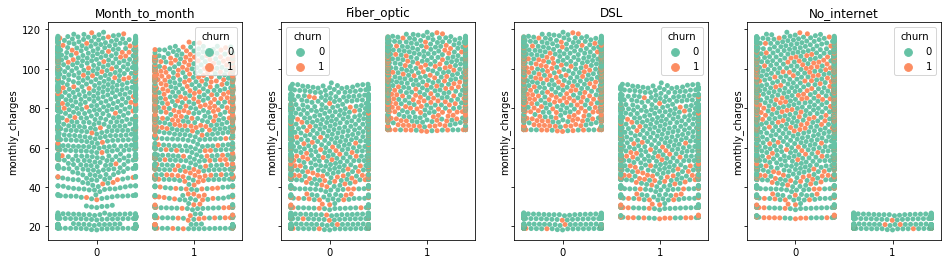

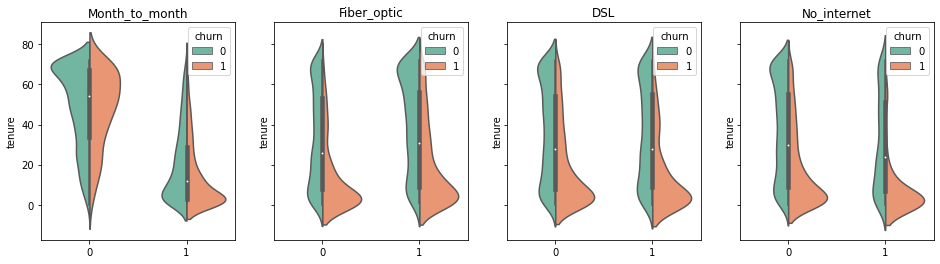

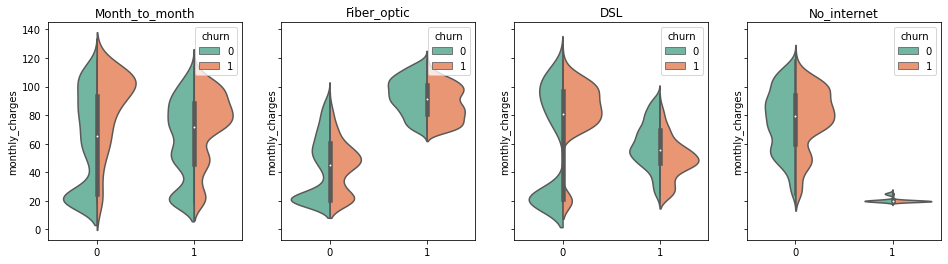

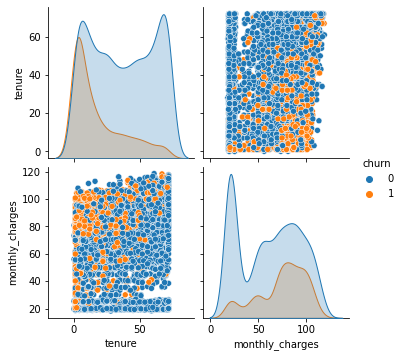

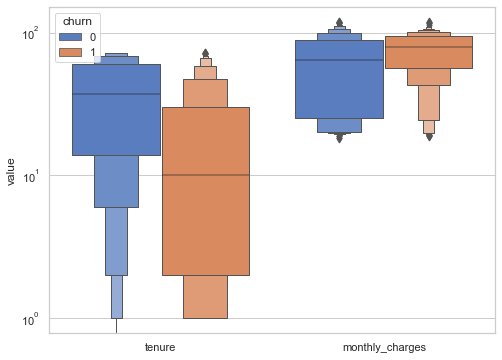

In [34]:
#Analysis of multple varianles with multiple categories isolated by hue(color)
#Based on takeaways from both univariate and bivariate takeaways
cat_vars = ['Month_to_month','Fiber_optic','DSL','No_internet']
quant_vars = ['tenure','monthly_charges']
explore.explore_multivariate(train,'churn', cat_vars,quant_vars)

<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

### <font color="blue">Multivariate Takeaways</font>

* There appears to be a dependency on churn and month-to-month customer contracts
    - Month-to-month customers pay more than others
* Fiber customers have significantly higher monthly charges than customers without fiber octic.


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

### <font color="darkcyan">Time to Hypothesize</font>

#### __Test : 1. Are charges for customers who churn higher for those who do not churn?__

* $H_0$<u>(null hypothesis)</u> : "There is no difference in monthly charges for customers who churn and those who do not churn"
* $H_a$<u>(alternative hypothesis)</u> : "The monthly charges for customers who did churn were higher than for those who did not churn"

In [35]:
# Observations of churn from the train data
churn_Yes = train[train.churn == 1]
churn_No = train[train.churn == 0]

In [36]:
#Hypothesis testing used to find our answer
confidence_level = .95
alpha = 1 - confidence_level

null_hyp = "There is no difference in monthly charges for customers who churn and those who do not churn"
alt_hyp = "The monthly charges for customers who did churn were higher than for those who did not churn"


In [37]:
#wh's chruning?
(churn_Yes.Month_to_month == 1).mean(), (churn_Yes.Fiber_optic == 1).mean()


(0.8747609942638623, 0.6921606118546845)

In [38]:
print("87 percent of customers who churned were month-to-month customers")
print("69 percent of customers with fiber obtic churned")

87 percent of customers who churned were month-to-month customers
69 percent of customers with fiber obtic churned


In [39]:
#Fiber_optic x Month-to-month
((churn_Yes.Month_to_month == 1) & (churn_Yes.Fiber_optic == 1)).mean()

0.6147227533460803

In [40]:
print("61 percent of all churned customers were month-to-month fiber optic customers")

61 percent of all churned customers were month-to-month fiber optic customers


In [41]:
#use statistical tests to either reject or fail to reject my null hypotheis
t, p = stats.ttest_ind(churn_Yes.monthly_charges,churn_No.monthly_charges)
t, p

(12.117411797298109, 3.304107452529847e-33)

In [42]:
if (p/2) < alpha and t > 0:
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis


In [43]:
print(alt_hyp)

The monthly charges for customers who did churn were higher than for those who did not churn


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

### Test 2 : Are fiber optic custmers more liekly to churn?

In [44]:
#Hypothesis testing used to find our answer
confidence_level = .95
alpha = 1 - confidence_level

null_hyp = "Churn and fiber optic service are independent from one another "
alt_hyp = "Customer is more likely to churn if they have fiber_optic service"


In [45]:
#use chi2 to compare categorical variables
#Crosstab first
observed = pd.crosstab(train.churn, train.Fiber_optic)
observed

Fiber_optic,0,1
churn,,
0,1881,1016
1,322,724


In [46]:
#chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(362.033240845499,
 1.0159095193215674e-80,
 1,
 array([[1618.58762364, 1278.41237636],
        [ 584.41237636,  461.58762364]]))

In [47]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


In [48]:
print(alt_hyp)

Customer is more likely to churn if they have fiber_optic service


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

# <font color="darkcyan">Data Modeling</font>


In [49]:
#Split variables
#X_train
# Splitting out target variable from X_train

features = ['no_tech_support', 'has_auto_pay','month_to_month','streamer','fiber']
target = ['churn']

X_train = train.drop(columns = ['churn', 'total_charges', 'customer_id'],axis=1)
X_validate = validate.drop(columns = ['churn', 'total_charges', 'customer_id'],axis=1)
X_test = test.drop(columns = ['churn', 'total_charges', 'customer_id'],axis=1)

In [50]:
#Set y_train
#Target is churn
y_train = train.churn
y_validate = validate.churn
y_test = test.churn

### set baseline

In [51]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [52]:
train['baseline_prediction'] = 0
baseline_accuracy = (train.churn == train.baseline_prediction).mean()
print(f"The baseline accuracy is " , baseline_accuracy.round(2), "percent")


The baseline accuracy is  0.73 percent


# <font color="darkgreen"> First Model: Decision Tree</font>

In [53]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
clf = clf.fit(X_train,y_train)

In [54]:
y_train.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [55]:
#Training data
decision_tree_report = get_metrics(clf, X_train, y_train)
decision_tree_report

confusion matrix: 
 [[2695  202]
 [ 603  443]]


    The accuracy for our model is 0.7958
    The True Positive Rate is 0.424, The False Positive Rate is 0.0697,
    The True Negative Rate is 0.93, and the False Negative Rate is 0.576
    


,precision,recall,f1-score,support
0,0.817162,0.930273,0.870056,2897.000000
1,0.686822,0.423518,0.523950,1046.000000
accuracy,0.795841,0.795841,0.795841,0.795841
macro avg,0.751992,0.676895,0.697003,3943.000000
weighted avg,0.782585,0.795841,0.778241,3943.000000


In [56]:
#Validate data
decision_tree_report_validate = get_metrics(clf,X_validate,y_validate)
decision_tree_report_validate

confusion matrix: 
 [[1167   75]
 [ 276  173]]


    The accuracy for our model is 0.7924
    The True Positive Rate is 0.385, The False Positive Rate is 0.0604,
    The True Negative Rate is 0.94, and the False Negative Rate is 0.615
    


,precision,recall,f1-score,support
0,0.808732,0.939614,0.869274,1242.000000
1,0.697581,0.385301,0.496413,449.000000
accuracy,0.792431,0.792431,0.792431,0.792431
macro avg,0.753156,0.662457,0.682843,1691.000000
weighted avg,0.779219,0.792431,0.770271,1691.000000


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

# <font color="darkgreen">Second Model: Random Forest</font>


In [57]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=4, 
                            random_state=123)
rf = rf.fit(X_train, y_train)


In [58]:
#training data
rf_report = get_metrics(rf,X_train,y_train)
rf_report

confusion matrix: 
 [[2719  178]
 [ 633  413]]


    The accuracy for our model is 0.7943
    The True Positive Rate is 0.395, The False Positive Rate is 0.0614,
    The True Negative Rate is 0.939, and the False Negative Rate is 0.605
    


,precision,recall,f1-score,support
0,0.811158,0.938557,0.870219,2897.000000
1,0.698816,0.394837,0.504582,1046.000000
accuracy,0.794319,0.794319,0.794319,0.794319
macro avg,0.754987,0.666697,0.687400,3943.000000
weighted avg,0.781355,0.794319,0.773223,3943.000000


In [59]:
#validate
rf_report_validate = get_metrics(rf,X_validate,y_validate)
rf_report_validate

confusion matrix: 
 [[1173   69]
 [ 284  165]]


    The accuracy for our model is 0.7912
    The True Positive Rate is 0.367, The False Positive Rate is 0.0556,
    The True Negative Rate is 0.944, and the False Negative Rate is 0.633
    


,precision,recall,f1-score,support
0,0.805079,0.944444,0.869211,1242.000000
1,0.705128,0.367483,0.483163,449.000000
accuracy,0.791248,0.791248,0.791248,0.791248
macro avg,0.755104,0.655964,0.676187,1691.000000
weighted avg,0.778540,0.791248,0.766706,1691.000000


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

# <font color = "darkgreen"> Third Model KNN(K-Nearest Neighbor)</font>

In [60]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

#training data report
knn_report = get_metrics(knn,X_train,y_train)
knn_report

confusion matrix: 
 [[2797  100]
 [ 508  538]]


    The accuracy for our model is 0.8458
    The True Positive Rate is 0.514, The False Positive Rate is 0.0345,
    The True Negative Rate is 0.965, and the False Negative Rate is 0.486
    


,precision,recall,f1-score,support
0,0.846293,0.965482,0.901967,2897.000000
1,0.843260,0.514340,0.638955,1046.000000
accuracy,0.845803,0.845803,0.845803,0.845803
macro avg,0.844777,0.739911,0.770461,3943.000000
weighted avg,0.845489,0.845803,0.832195,3943.000000


In [61]:
knn_report_validate = get_metrics(knn,X_validate,y_validate)
knn_report_validate

confusion matrix: 
 [[1135  107]
 [ 274  175]]


    The accuracy for our model is 0.7747
    The True Positive Rate is 0.39, The False Positive Rate is 0.0862,
    The True Negative Rate is 0.914, and the False Negative Rate is 0.61
    


,precision,recall,f1-score,support
0,0.805536,0.913849,0.856281,1242.00000
1,0.620567,0.389755,0.478796,449.00000
accuracy,0.774690,0.774690,0.774690,0.77469
macro avg,0.713052,0.651802,0.667538,1691.00000
weighted avg,0.756422,0.774690,0.756050,1691.00000


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

# <font color="darkgreen">Fourth Model</font>

In [62]:
logit = LogisticRegression(C=1, class_weight='balanced',
                           random_state=123,solver='liblinear')
logit = logit.fit(X_train, y_train)

In [63]:
#training data 
logistic_report = get_metrics(logit,X_train,y_train)
logistic_report

confusion matrix: 
 [[2097  800]
 [ 216  830]]


    The accuracy for our model is 0.7423
    The True Positive Rate is 0.793, The False Positive Rate is 0.276,
    The True Negative Rate is 0.724, and the False Negative Rate is 0.207
    


,precision,recall,f1-score,support
0,0.906615,0.723852,0.804990,2897.000000
1,0.509202,0.793499,0.620329,1046.000000
accuracy,0.742328,0.742328,0.742328,0.742328
macro avg,0.707909,0.758676,0.712660,3943.000000
weighted avg,0.801189,0.742328,0.756003,3943.000000


In [64]:
#validate 
log_report_validate = get_metrics(logit,X_validate,y_validate)
log_report_validate

confusion matrix: 
 [[904 338]
 [ 86 363]]


    The accuracy for our model is 0.7493
    The True Positive Rate is 0.808, The False Positive Rate is 0.272,
    The True Negative Rate is 0.728, and the False Negative Rate is 0.192
    


,precision,recall,f1-score,support
0,0.913131,0.727858,0.810036,1242.000000
1,0.517832,0.808463,0.631304,449.000000
accuracy,0.749261,0.749261,0.749261,0.749261
macro avg,0.715481,0.768161,0.720670,1691.000000
weighted avg,0.808170,0.749261,0.762578,1691.000000


<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

# <font color="darkcyan">Modeling Takeaways:</font> 
   - **Model 4: Chose this model as it gave me the highest true positive rate of my other models.**
  

<hr style="border-top: 10px groove red; margin-top: 1px; margin-bottom: 1px"></hr> 

## <font color="slateblue">**Predictions based on churn data**</font>


In [65]:
#Test model 4 data
y_pred = logit.predict(X_train)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [66]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba

array([[0.67556462, 0.32443538],
       [0.18285512, 0.81714488],
       [0.8271979 , 0.1728021 ],
       ...,
       [0.28243302, 0.71756698],
       [0.35407999, 0.64592001],
       [0.95527723, 0.04472277]])

In [67]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.74


In [69]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.75
[[764 271]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409



In [81]:
#Made csv in another notebook

# Conclusions
- Throughout my exploration process I was able to conclude that there is a correlation in regards to churn with customers who have fiber_optic service on a month-to-month contract.
    - I would hypothesize that one of the main contributiong factors leading to this level of churn would be price based
- Given more time I could work on further models that would grant a more precise understanding of the data, add more feature, as well 
- Thank You for your time!